In [79]:
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import numpy as np

目标函数:   $f(x) = 3x^3 + 2x^2 + 0.9x + 10 $

In [175]:
def target_fn(x):
    return 3*x**3 + 0.9*x+10

函数可视化

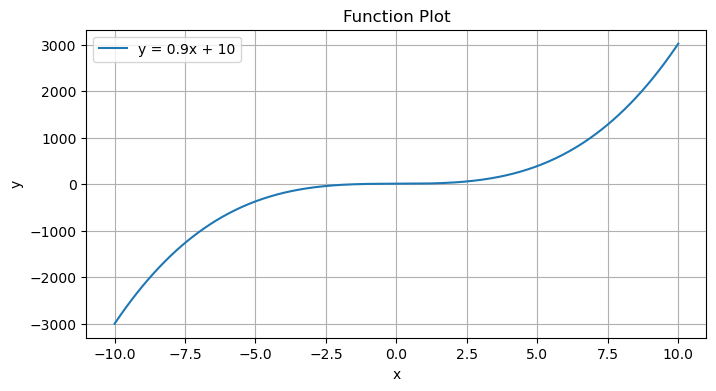

In [176]:
# 定义x的范围和间隔
x = np.linspace(-10, 10, 400)  # 从-10到10，取400个点
y = target_fn(x)

plt.figure(figsize=(8,4))  # 设置图像大小
plt.plot(x, y, label="y = 0.9x + 10")
plt.title("Function Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [181]:
# 拟合线性函数
torch.manual_seed(42)

fn = nn.Linear(1,1)
optimizer = optim.Adam(fn.parameters(), lr=0.0015)
criterion = nn.MSELoss()  # 实例化损失函数

best_value = 50000000
count =0 
for i in range(60000):
    y_predict = fn(torch.tensor(x).float().unsqueeze(1))
    loss = criterion(y_predict,torch.tensor(y).float().unsqueeze(1))
    loss.backward()
    optimizer.step()
    
    if loss.item() < best_value:
        best_value = loss.item()
        count = 0
    else:
        count +=1
    
    if i % 5000 == 0:
        print(f"MSE Loss is {loss}")
    # 早停，如果30个值连续值没有提升则停止
    if count >=1000:
        print("early stop")
        break
    

print(f"weight is {fn.weight}")
print(f"bias is {fn.bias}")


MSE Loss is 1306839.375
MSE Loss is 1185138.75
MSE Loss is 1089882.375
MSE Loss is 1004144.75
MSE Loss is 924654.1875
MSE Loss is 850282.5625
MSE Loss is 780523.0625
MSE Loss is 715149.0625
MSE Loss is 653961.5
MSE Loss is 596979.5
MSE Loss is 543915.1875
MSE Loss is 494977.75
weight is Parameter containing:
tensor([[96.9680]], requires_grad=True)
bias is Parameter containing:
tensor([8.7985], requires_grad=True)


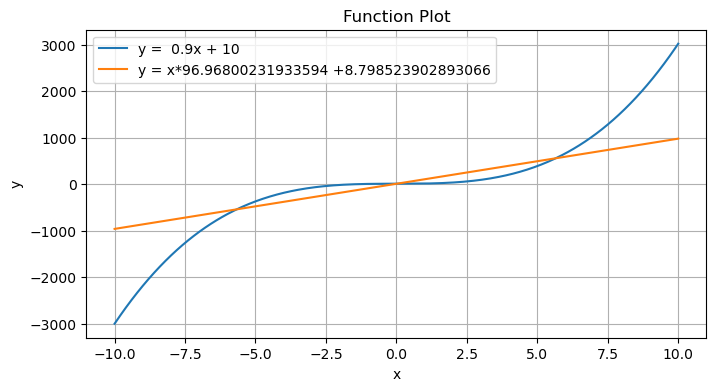

In [182]:
x = np.linspace(-10, 10, 400)  # 从-10到10，取400个点
y = target_fn(x)
y_predict = x*fn.weight.item() + fn.bias.item()

plt.figure(figsize=(8,4))  # 设置图像大小
plt.plot(x, y, label="y =  0.9x + 10")
plt.plot(x, y_predict, label=f"y = x*{fn.weight.item()} +{fn.bias.item()}")

plt.title("Function Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

引入非线性多个神经元

MSE Loss is 284492224.0
MSE Loss is 205058496.0
MSE Loss is 183427232.0
MSE Loss is 140312912.0
MSE Loss is 157528320.0
MSE Loss is 125428264.0
MSE Loss is 119699840.0
MSE Loss is 132692080.0
MSE Loss is 112465736.0
MSE Loss is 117818344.0
MSE Loss is 102152576.0
MSE Loss is 117037976.0
MSE Loss is 115009840.0
MSE Loss is 100724768.0
MSE Loss is 98744984.0
MSE Loss is 99323944.0
MSE Loss is 95348464.0
MSE Loss is 97002168.0
MSE Loss is 116299888.0
MSE Loss is 96570728.0
MSE Loss is 112894504.0
MSE Loss is 78283280.0
MSE Loss is 93342776.0
MSE Loss is 101727648.0
MSE Loss is 87055008.0
MSE Loss is 74160200.0
MSE Loss is 97178968.0
MSE Loss is 75905192.0
MSE Loss is 73542600.0
MSE Loss is 77299344.0
MSE Loss is 81526816.0
MSE Loss is 79630072.0
MSE Loss is 81942688.0
MSE Loss is 80957384.0
MSE Loss is 82542576.0
MSE Loss is 74764464.0
MSE Loss is 80332256.0
MSE Loss is 76890360.0
MSE Loss is 79854824.0
MSE Loss is 82591296.0
MSE Loss is 71475472.0
MSE Loss is 74462920.0
MSE Loss is 91353

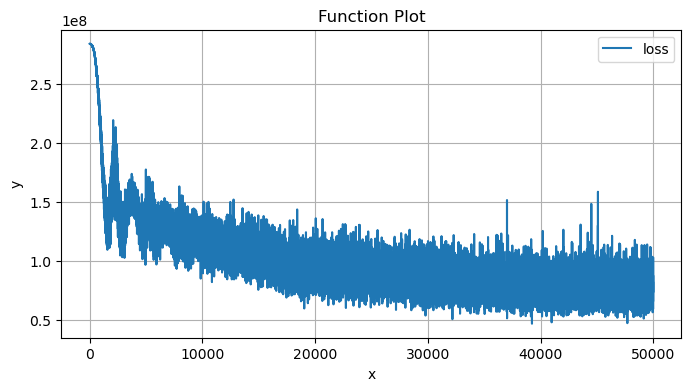

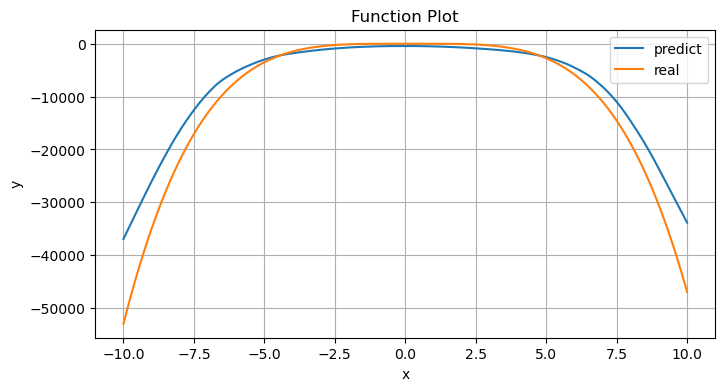

In [239]:
def target_fn(x):
    return (-5)*x**4 + 3*x**3 + 0.9*x+10

x = np.linspace(-10, 10, 400)  # 从-10到10，取400个点
y = target_fn(x)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fn1 = nn.Linear(1, 1024)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.9)  # 50% dropout

        self.fn2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.9) 
        
        self.fn3 = nn.Linear(512, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.9) 
        
        self.fn4 = nn.Linear(64, 1)


    def forward(self, x):
        x1 = self.dropout1(self.relu1(self.fn1(x)))
        x2 = self.dropout2(self.relu2(self.fn2(x1)))
        
        x3 = self.dropout3(self.relu3(self.fn3(x2)))

        return self.fn4(x3)

model = SimpleNN()
model = model.to(device)
optimizer = optim.Adam(model.parameters(),lr=0.00002)
criterion = nn.MSELoss()  # 实例化损失函数

stop_index = 0

x_data = torch.tensor(x).float().unsqueeze(1).to(device)
y_data = torch.tensor(y).float().unsqueeze(1).to(device)
loss_list = []
for i in range(50000):
    y_predict = model.forward(x_data)
    loss = criterion(y_predict,y_data)
    loss_list.append(loss.item())
    loss.backward()
    optimizer.step()
    
    if i % 1000 == 0:
        print(f"MSE Loss is {loss.item()}")
    
    if stop_index != 0 and stop_index == i:
        break

# print(f"weight is {fn.weight}")
# print(f"bias is {fn.bias}")

# 绘制损失曲线
x_loss = [i for i in range(len(loss_list))]
y_loss = loss_list

plt.figure(figsize=(8,4))  # 设置图像大小
plt.plot(x_loss,y_loss, label="loss")

plt.title("Function Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 可视化模型输出
# model = model.to("cpu")
model.eval()
predict_value = model(x_data)

x = x
y_predict = predict_value.squeeze(axis=1).to("cpu").detach().numpy()

plt.figure(figsize=(8,4))  # 设置图像大小
plt.plot(x, y_predict, label="predict")
plt.plot(x, y, label="real")

plt.title("Function Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

